In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

import dataretrieval.nwis as nwis

#import os.path

13092747 (2013-2023) Non-ref

" " 

12413370 (2010-2021) ref, 2490, 28.2

" "

13266000 ref (2017-2018)

" "

 13311000 (2012-2023) Usgs:  646619.3

" "

12305000 (2012-2023)

" "

13340600


In [2]:
site  = "13190500"
# get basic info about the site
df3 = nwis.get_record(sites=site, service='site')

print(df3)
dec_lat_va=df3['dec_lat_va'][0]
dec_long_va=df3['dec_long_va'][0]
station_nm=df3['station_nm'][0]
print(station_nm)

  agency_cd   site_no                               station_nm site_tp_cd  \
0      USGS  13190500  SF BOISE RIVER AT ANDERSON RANCH DAM ID         ST   

   lat_va  long_va  dec_lat_va  dec_long_va coord_meth_cd coord_acy_cd  ...  \
0  432037  1152839   43.343611    -115.4775             G            S  ...   

  local_time_fg reliability_cd  gw_file_cd  nat_aqfr_cd  aqfr_cd aqfr_type_cd  \
0             Y            NaN    NNNNNNNN          NaN      NaN          NaN   

  well_depth_va hole_depth_va  depth_src_cd  project_no  
0           NaN           NaN           NaN         NaN  

[1 rows x 42 columns]
SF BOISE RIVER AT ANDERSON RANCH DAM ID


In [3]:
path=  r"../data_prep/prism_df_summer_" +site +".csv"  # os.path.join( r"../data_prep/prism_df_summer_",  site ,".csv" )

data=pd.read_csv( path )  

#12413370,13190500
#13266000,
#13296000 (Yankee Fork Salmon River NR Clayton ID),
#13311000, 13340600, 13092747, 12305000, 13342500, 13150430, 13016450, 13176400, 13310800, 13317660, 13192200, 12322000, 13139510,13341050

print(data)
print(data.columns)

     Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0           153  2020-06-01      0.63               8.1               14.7   
1           154  2020-06-02      0.00               9.6               15.6   
2           155  2020-06-03      0.00               7.2               16.0   
3           156  2020-06-04      0.00              10.7               18.1   
4           157  2020-06-05      0.00               9.6               16.5   
..          ...         ...       ...               ...                ...   
363        1335  2023-08-27      3.48              13.7               21.6   
364        1336  2023-08-28      0.00              13.6               22.1   
365        1337  2023-08-29      0.00              13.6               23.1   
366        1338  2023-08-30      0.00              10.9               21.5   
367        1339  2023-08-31      0.00               6.2               13.4   

     tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  vpdmax

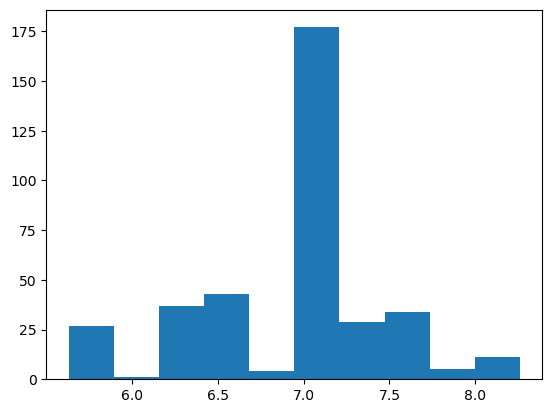

(array([ 66.,  46., 177.,  27.,  36.,   2.,   3.,   2.,   1.,   8.]),
 array([ 280.,  638.,  996., 1354., 1712., 2070., 2428., 2786., 3144.,
        3502., 3860.]),
 <BarContainer object of 10 artists>)

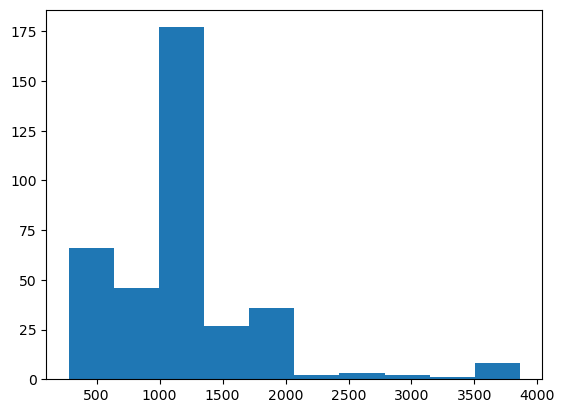

In [4]:
data['log_Q']=np.log(data['X_00060_00003'])
data
plt.hist(data['log_Q'])
plt.show()
plt.hist(data['X_00060_00003'])

Text(0, 0.5, 'Streamflow (cfs)')

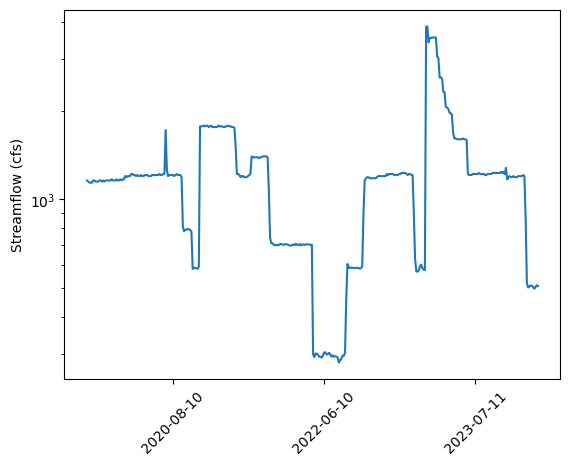

In [5]:
plt.plot(data['Date'] , data['X_00060_00003'] )
plt.yscale('log')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Streamflow (cfs)")

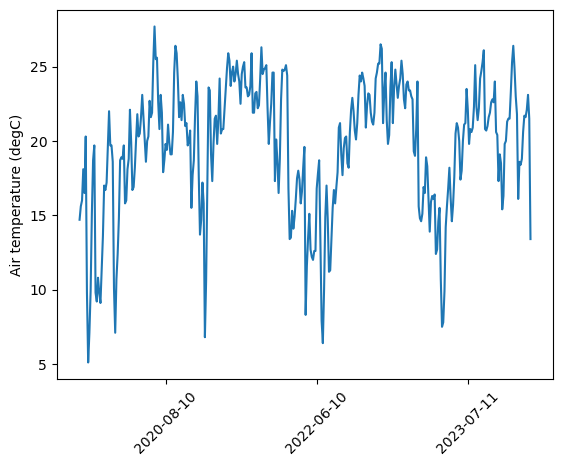

In [6]:
plt.plot(data['Date'] , data['tmean..degrees.C.'] )


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

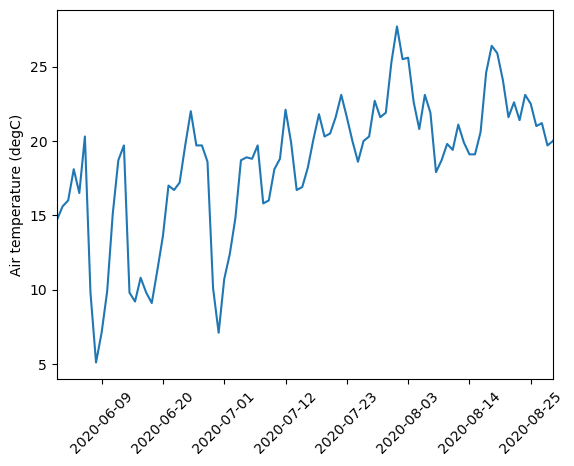

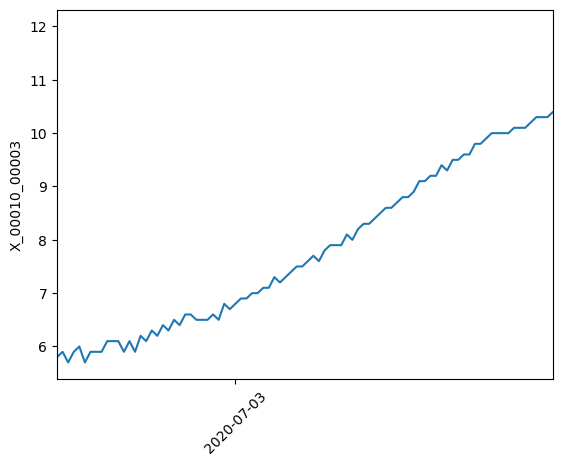

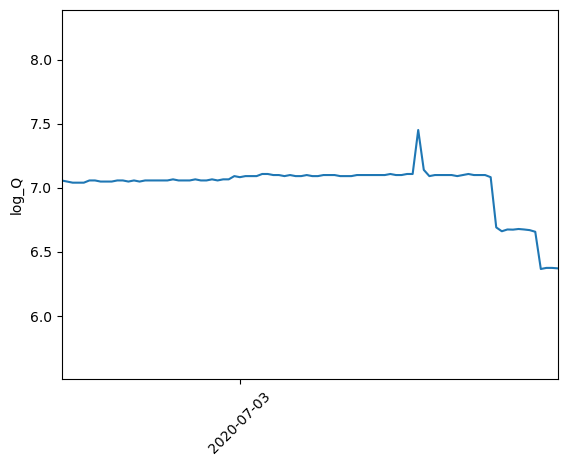

In [7]:
start=0
end=89

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

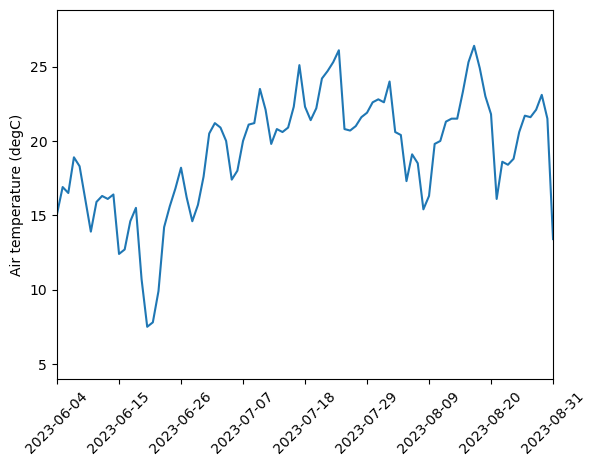

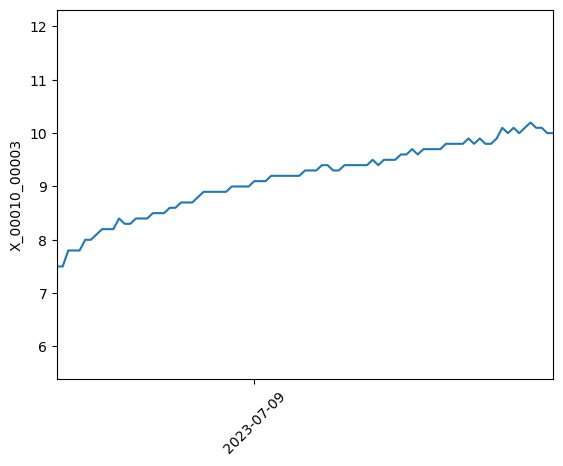

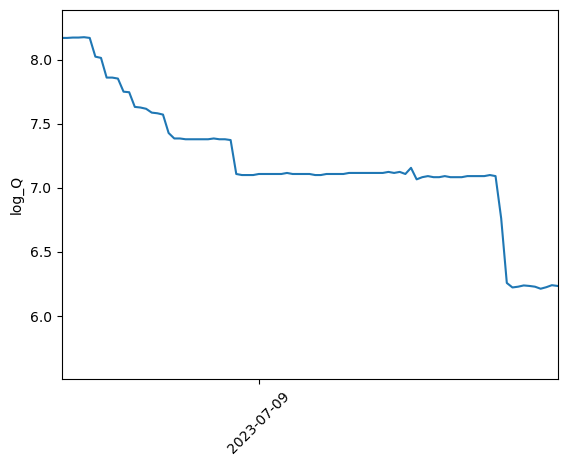

In [8]:
start=len(data)-89
end=len(data)-1

plt.plot(data['Date'] , data['tmean..degrees.C.'] )
plt.xlim(  data['Date'][start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=11))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel("Air temperature (degC)")
plt.show()

plt.plot(data['Date'] , data['X_00010_00003'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('X_00010_00003')
plt.show()

plt.plot(data['Date'] , data['log_Q'] )
plt.xlim(  data['Date'][ start],  data['Date'][ end])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.ylabel('log_Q')
plt.show()

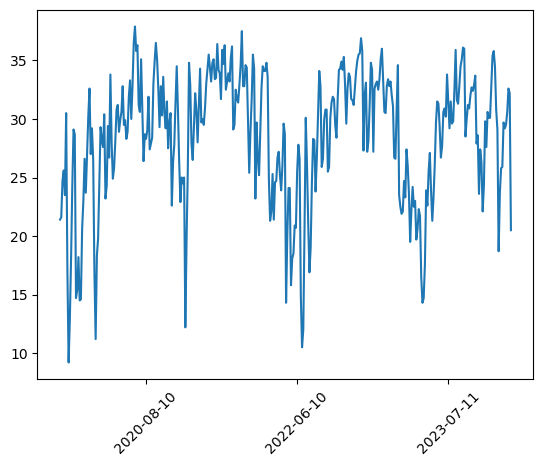

In [9]:
plt.plot(data['Date'] , data[ 'tmax..degrees.C.'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

Text(0, 0.5, 'Water temperature (degC)')

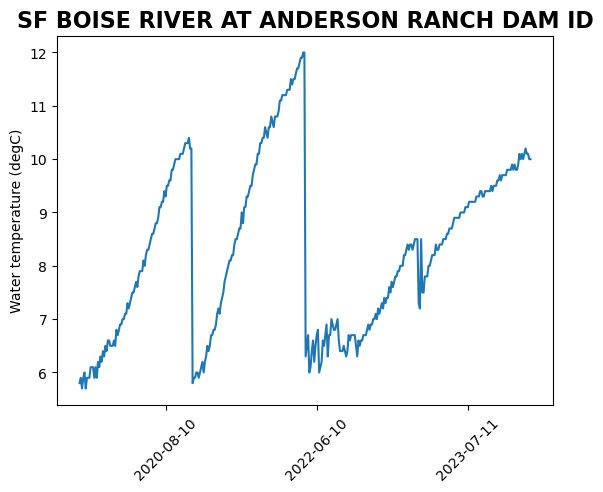

In [10]:
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.ylabel("Water temperature (degC)")

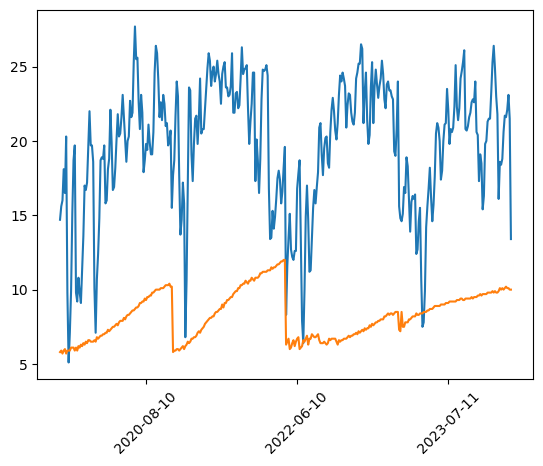

In [11]:
plt.plot(data['Date'] , data[ 'tmean..degrees.C.'] )
plt.plot(data['Date'] , data[ 'X_00010_00003'] )
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=123))  # Display every 10th label
plt.gca().xaxis.set_tick_params(rotation=45)

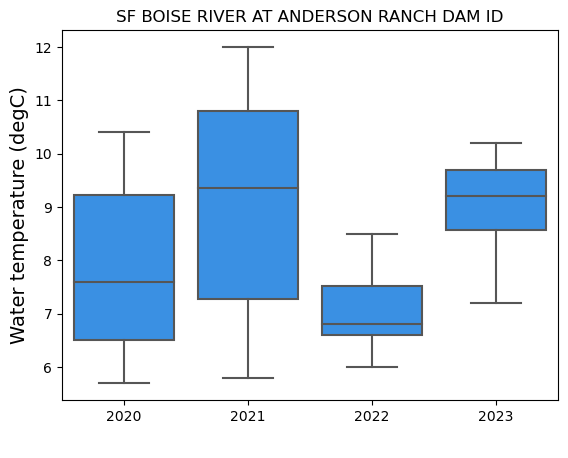

In [12]:
#data.boxplot(column=['X_00010_00003'], by='yr', title=station_nm)

#plt.ylabel("Water temperature (degC)")


import seaborn as sns



ax=sns.boxplot(x="yr", y="X_00010_00003", data=data , color="dodgerblue")
ax.set_ylabel( "Water temperature (degC)" , fontsize=14 #, color="red"
             )
ax.set_xlabel( " " , fontsize=14 #, color="red"
             )
ax.set_title( station_nm)
plt.show()

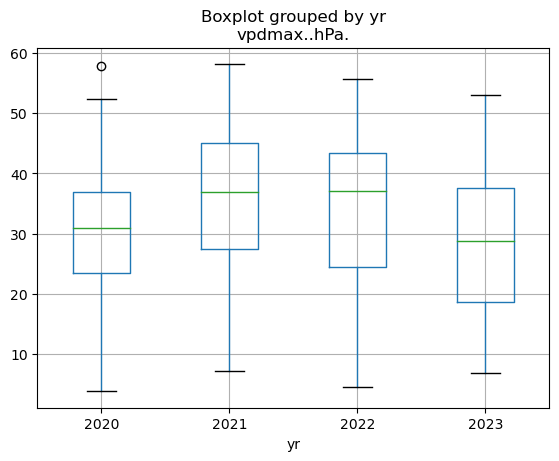

In [13]:
# 'vpdmax..hPa.'
data.boxplot(column=['vpdmax..hPa.'], by='yr')
plt.show()

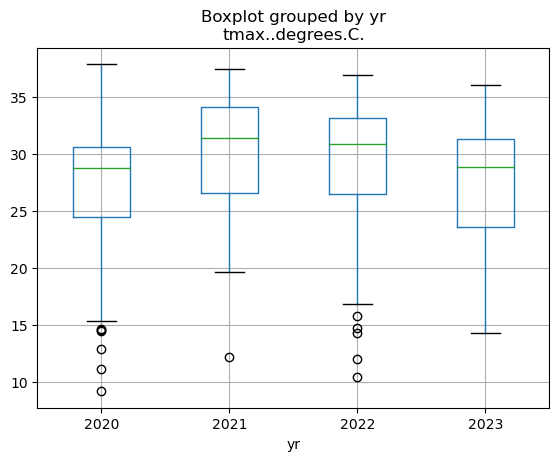

In [14]:
data.boxplot(column=['tmax..degrees.C.'], by='yr')
plt.show()

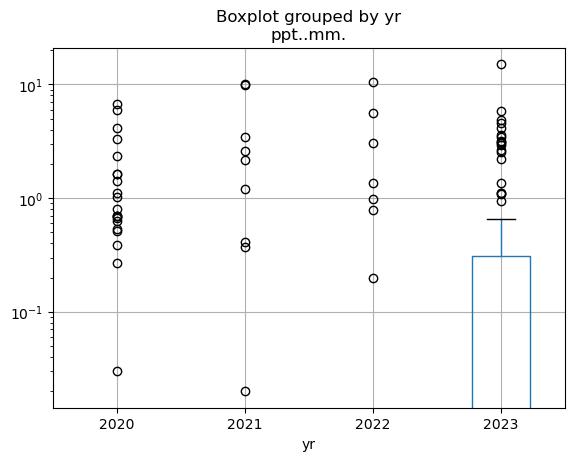

In [15]:
data.boxplot(column=['ppt..mm.'], by='yr')

plt.yscale('log')
plt.show()

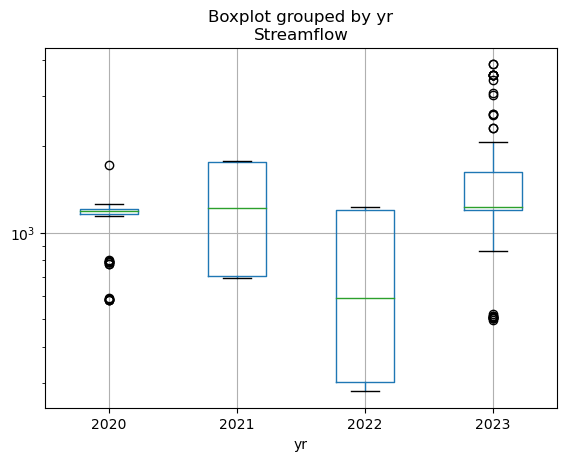

In [16]:
data.boxplot(column=['X_00060_00003'], by='yr')
plt.yscale('log')
plt.title("Streamflow")
plt.show()

In [17]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.232495
X_00010_00001,0.232495,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.123702          -0.287447   
tmin..degrees.C.   -0.123702          1.000000           0.928671   
tmean..degrees.C.  -0.287447          0.928671           1.000000   
tmax..degrees.C.   -0.374296          0.806654           0.968238   
tdmean..degrees.C.  0.337871          0.382137           0.218421   
vpdmin..hPa.       -0.387263          0.661237           0.760738   
vpdmax..hPa.       -0.403271          0.725801           0.910601   
X_00010_00001      -0.044716          0.264847           0.256068   
X_00010_00003      -0.036841          0.344391           0.325645   
X_00060_00003       0.079673         -0.013718          -0.045057   
doy                -0.111921          0.502514           0.492616   
log_Q              -0.002617          0.141353           0.122740   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -

<Axes: >

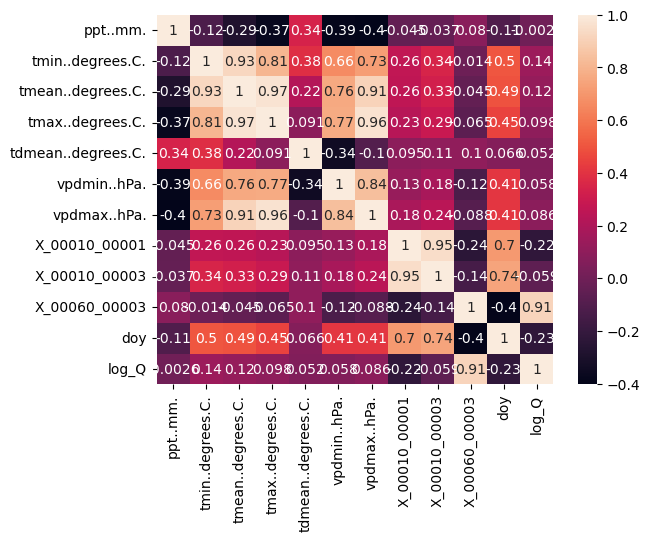

In [18]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy','log_Q' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
ppt..mm.           1.000000          -0.287447     -0.403271 -0.002617
tmean..degrees.C. -0.287447           1.000000      0.910601  0.122740
vpdmax..hPa.      -0.403271           0.910601      1.000000  0.086393
log_Q             -0.002617           0.122740      0.086393  1.000000


<Axes: >

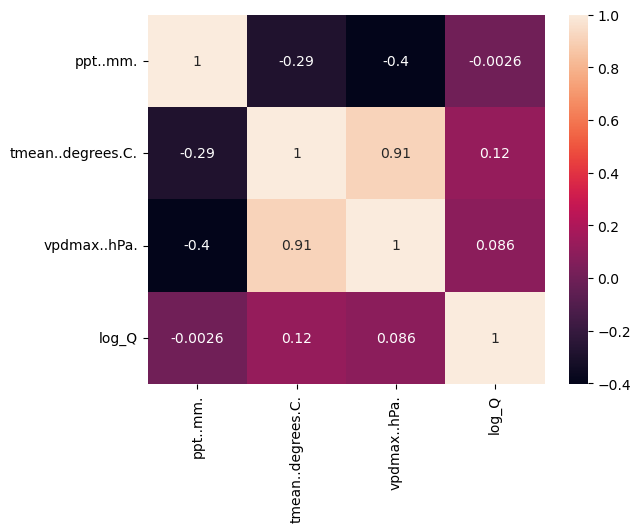

In [19]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.' #, 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
     #  'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
     ,'log_Q'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [20]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_train.columns)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q
349      0.00               21.5         36.45  7.081709
307      0.00               21.2         37.31  7.377759
75       0.00               19.1         33.01  7.098376
84       0.00               23.1         45.93  6.668228
356      0.94               21.8         28.87  7.090077
..        ...                ...           ...       ...
71       0.00               19.4         32.61  7.090077
106      0.00               23.4         41.94  7.473069
270      0.00               23.0         39.52  6.352629
348      0.00               21.3         35.27  7.081709
102     10.10                6.8          7.12  7.473069

[294 rows x 4 columns]
349     9.8
307     8.9
75      9.8
84     10.1
356     9.8
       ... 
71      9.5
106     6.5
270     8.4
348     9.8
102     6.2
Name: X_00010_00003, Length: 294, dtype: float64
Index(['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q'], dtype='object')


In [21]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]




X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q', 'yr']
0      5.8
1      5.9
2      5.7
3      5.9
4      6.0
      ... 
87    10.3
88    10.3
89    10.4
90    10.2
91    10.2
Name: X_00010_00003, Length: 92, dtype: float64


In [22]:
print(X_train)

X_train=X_train[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]
X_test= X_test[[ 'ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']]

    ppt..mm.  tmean..degrees.C.  vpdmax..hPa.     log_Q    yr
0       0.63               14.7         17.42  7.056175  2020
1       0.00               15.6         16.23  7.047517  2020
2       0.00               16.0         23.05  7.038784  2020
3       0.00               18.1         24.37  7.038784  2020
4       0.00               16.5         22.19  7.038784  2020
..       ...                ...           ...       ...   ...
87      0.81               21.2         35.15  6.373320  2020
88      0.00               19.7         26.76  6.373320  2020
89      0.00               20.0         33.04  6.369901  2020
90      0.00               20.7         37.28  6.366470  2020
91      0.00               15.5         22.92  6.381816  2020

[92 rows x 5 columns]


0.789149827016589


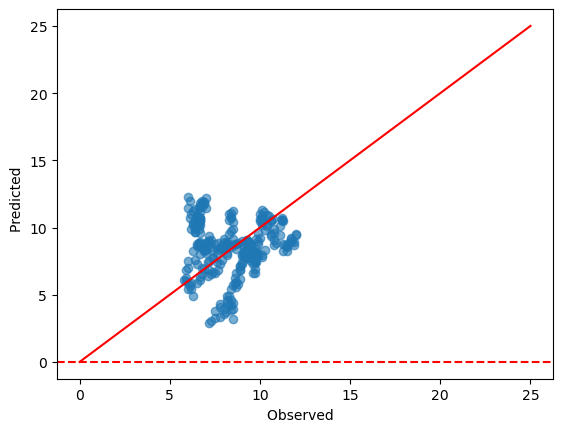

test: 0.07021469189168346
1.963963313884177


In [23]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [24]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.6542219554525791
test correlation_coefficient: 0.09045237738634336
MSE: 1.4859622876733676
RMS: 1.8764596645943403
max depth: 2
test correlation_coefficient: 0.8377904253913747
test correlation_coefficient: 0.1626269393676898
MSE: 1.5742686152998855
RMS: 1.9250308472417612
max depth: 3
test correlation_coefficient: 0.9085923667026736
test correlation_coefficient: 0.1578354727976291
MSE: 1.530900721427769
RMS: 1.8990305336675222
max depth: 4
test correlation_coefficient: 0.9284224190848569
test correlation_coefficient: 0.16025718878610867
MSE: 1.492583786231884
RMS: 1.8700513367537948
max depth: 5
test correlation_coefficient: 0.9483152464703524
test correlation_coefficient: 0.1485386069055525
MSE: 1.4979068798933866
RMS: 1.873392366089417
max depth: 6
test correlation_coefficient: 0.9606098995717568
test correlation_coefficient: 0.13491588387579576
MSE: 1.5221601104209799
RMS: 1.904192458443886
max depth: 7
test correlation_coefficient: 0.97

max depth: 5
correlation_coefficient: 0.1485386069055525
MSE: 1.4979068798933866
RMS: 1.873392366089417


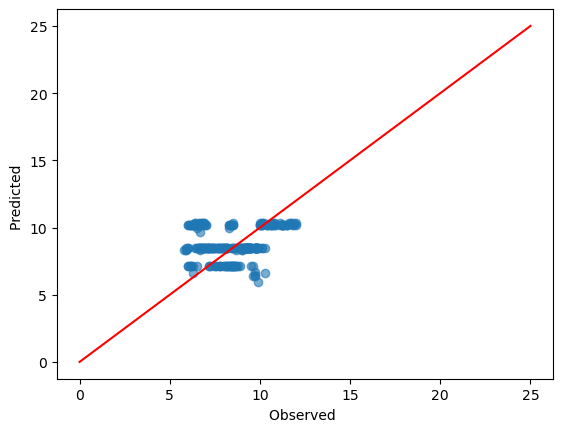

In [25]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [26]:
print(regr.feature_importances_)
print(idv)

[0.00135675 0.05359535 0.47980082 0.46524708]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'log_Q']


In [27]:
params = {
    "n_estimators":  30,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [28]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 2.5862


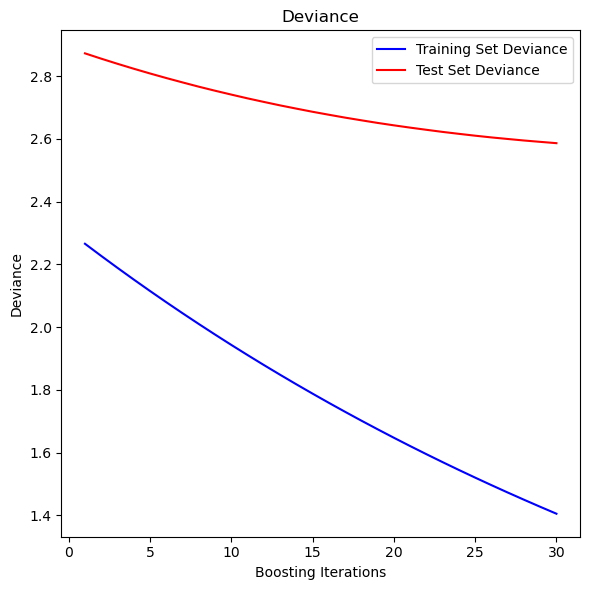

In [29]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

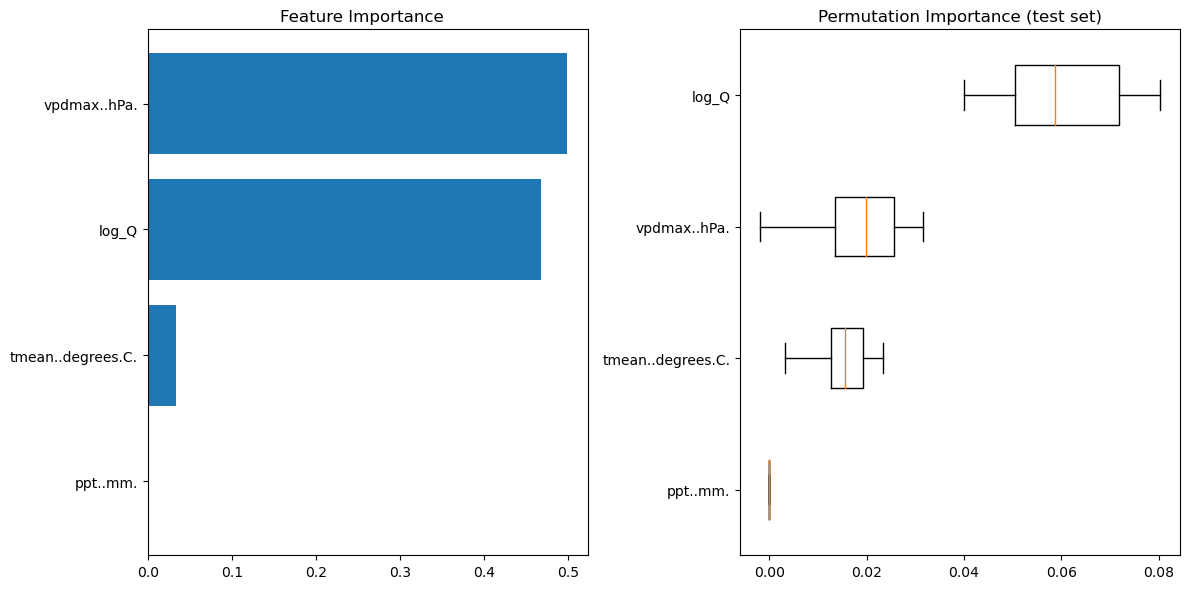

In [30]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [31]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [32]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    
    
    perm_sorted_idx = result.importances_mean.argsort()
    print(perm_sorted_idx)
    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

[0 1 2 3]


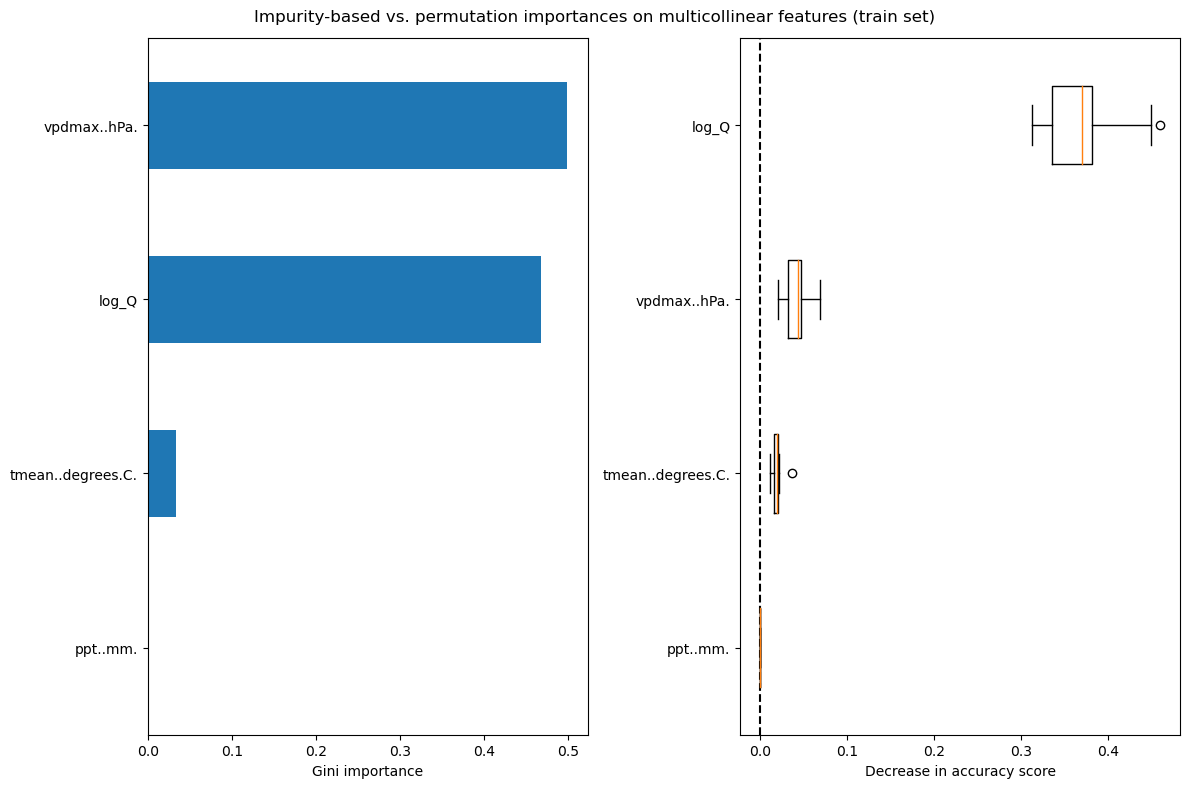

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.16318043347030298
MSE: 1.3912245982379445
RMS: 1.6081958761928576


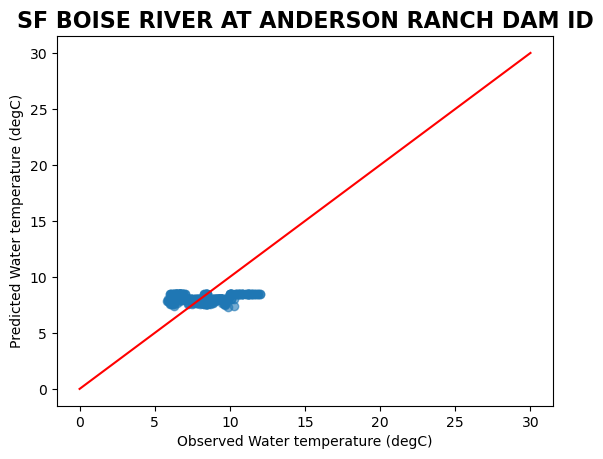

In [34]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed Water temperature (degC)")
plt.ylabel("Predicted Water temperature (degC)")

x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y, color='red')

plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.show()

92      5.8
93      5.9
94      5.9
95      6.0
96      6.0
       ... 
363    10.2
364    10.1
365    10.1
366    10.0
367    10.0
Name: X_00010_00003, Length: 276, dtype: float64
[7.82042137 7.82042137 8.03700788 8.03700788 8.03700788 7.82042137
 7.61919583 7.62365538 7.64313256 7.65499841 7.61919583 7.61919583
 7.64313256 8.03700788 8.03700788 8.03700788 7.82042137 8.03700788
 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788
 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788
 8.03700788 8.03700788 8.03700788 8.02486509 8.02486509 8.02486509
 8.02486509 8.02486509 8.02486509 8.02486509 8.03700788 8.03700788
 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788
 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788 8.03700788
 8.03700788 8.03700788 7.38315446 8.45527195 8.45527195 8.45527195
 8.45527195 8.45527195 8.45527195 8.4878094  8.4878094  8.45527195
 8.45527195 8.45527195 8.4878094  8.45527195 8.45527195 8.4878094
 8.45527195 8.45

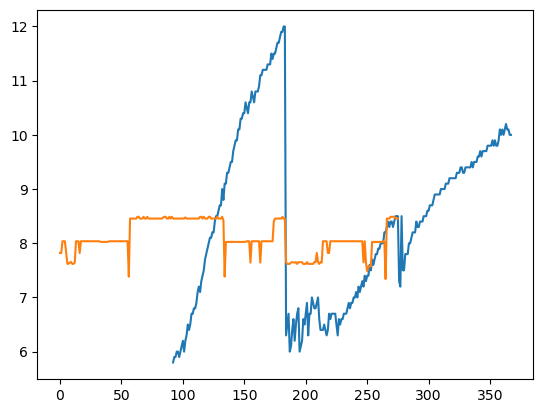

92     2021-06-01
93     2021-06-02
94     2021-06-03
95     2021-06-04
96     2021-06-05
          ...    
363    2023-08-27
364    2023-08-28
365    2023-08-29
366    2023-08-30
367    2023-08-31
Name: Date, Length: 276, dtype: object


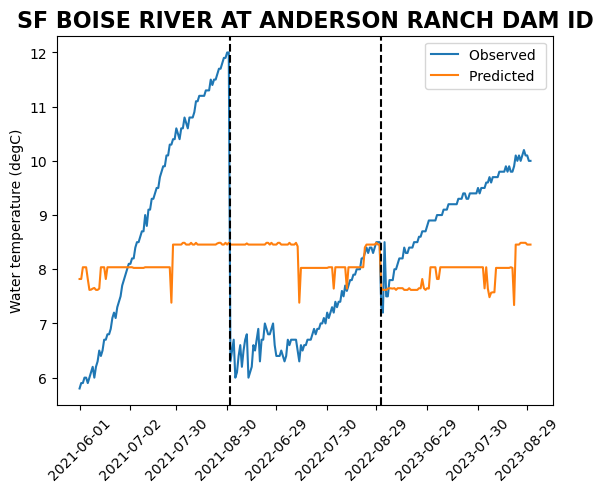

In [35]:



print(y_test)
print(yfit)
print(Y)
plt.plot(y_test)
plt.plot(yfit)
plt.show()

date=data[data['yr']>=2021][  'Date']
print(date)
plt.plot(date,y_test , label='Observed ')

#plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter())  # Formats labels concisely

plt.plot(date,yfit , label='Predicted ')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Display every 10th label
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts for missing dates
plt.axvline(x= "2022-06-01", color='black', linestyle='--')
plt.axvline(x= "2023-06-01", color='black', linestyle='--')
plt.gca().xaxis.set_tick_params(rotation=45 )  # Rotate labels for readability
plt.ylabel("Water temperature (degC)")
#pd.dataframe("date"= ,"y_test"= ,"yfit"=yfit)
plt.title( station_nm, fontsize=16, fontweight="bold" #, color="red"
         )
plt.legend()

In [36]:
max_bias=max(yfit-y_test)
max_bias

2.455271945377646

In [37]:
#plt.hist(y_test , alpha=0.5)
#plt.show()

#plt.hist(yfit , alpha=0.5)
#plt.show()

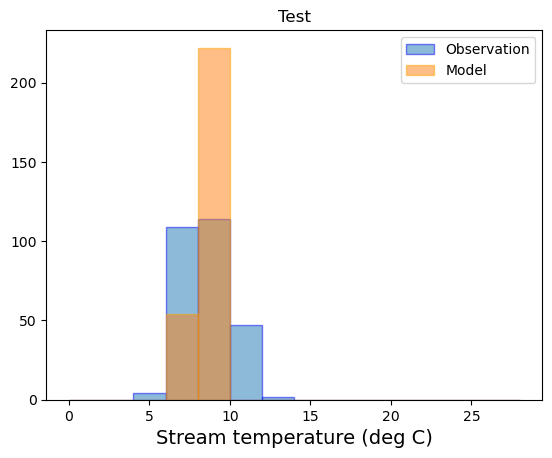

In [38]:
bins = np.arange(10, 25, 2)
bins = np.arange(0, 30, 2)
bars1, _, _ = plt.hist(y_test , alpha=0.5 , label="Observation",bins=bins , edgecolor='blue')
bars2, _, _ = plt.hist(yfit , alpha=0.5, label="Model",bins=bins , edgecolor='orange')
plt.legend(   )
plt.xlabel("Stream temperature (deg C)", fontsize=14 )
plt.title("Test")
plt.show()

In [39]:
#plt.hist(y_test , alpha=0.5)
#plt.hist(yfit , alpha=0.5)

#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["y_test","yfit"])
#plt.legend()

In [40]:
#plt.hist([ y_test,  yfit], stacked=True , alpha=0.6 , edgecolor='black', label= ["observation","model"])
#plt.legend()
#plt.xlabel("Stream temperature (deg C)", fontsize=14 )
#plt.title("Test")

upper alpha=0.95

correlation_coefficient: 0.17683152199283816
MSE: 1.606944443719647
RMS: 1.9917763447886314


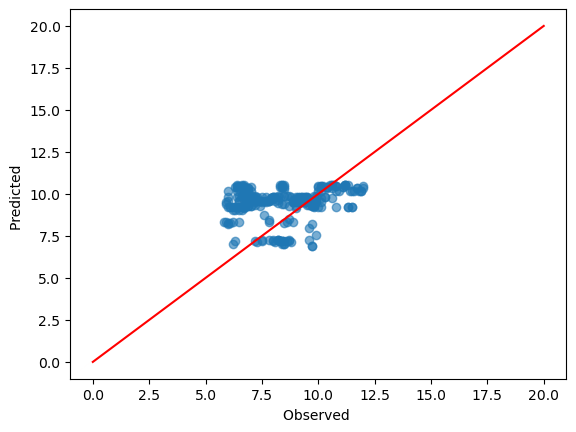

In [41]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

lower upper alpha=0.05

correlation_coefficient: 0.23339796567238977
MSE: 1.597099703908162
RMS: 1.8816160043965275


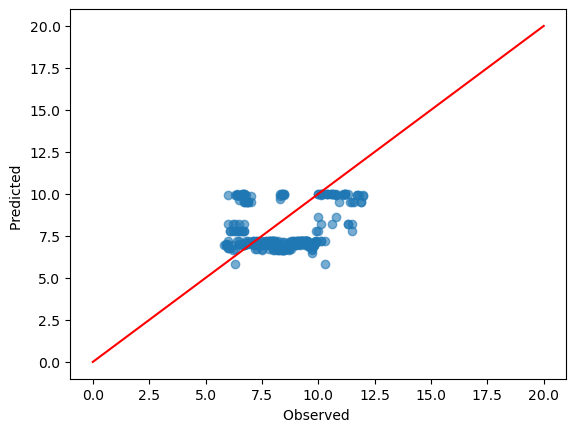

In [42]:
regr = ensemble.GradientBoostingRegressor(loss='quantile', alpha=0.05,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [43]:
params = {"loss": "lad" , #,"huber",
    "n_estimators":  250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

correlation_coefficient: 0.13035064194125548
MSE: 1.4842403764568428
RMS: 1.822477174571002


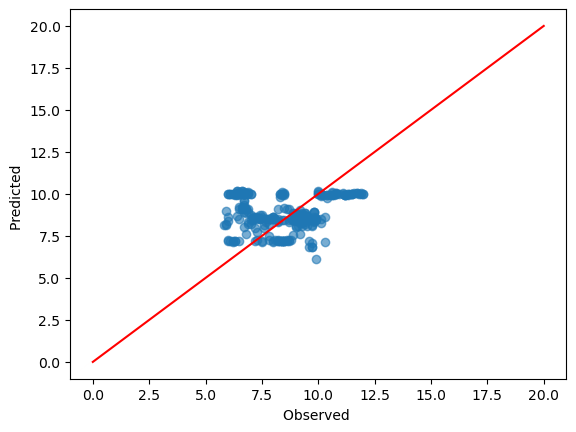

In [44]:
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 20, 20)
y = x
plt.plot(x, y, color='red')

plt.show()

In [45]:
data = {
    
    "site"  : [ site],

    
"station_nm" :[df3['station_nm'][0]],
    "dec_lat_va":[df3['dec_lat_va'][0]],
    "dec_long_va": [df3['dec_long_va'][0]],
    'max_bias': [max_bias],
        "RMS": [rms],
        "correlation_coefficient": [correlation_coefficient]
       }
result = pd.DataFrame(data)
print(result)

       site                               station_nm  dec_lat_va  dec_long_va  \
0  13190500  SF BOISE RIVER AT ANDERSON RANCH DAM ID   43.343611    -115.4775   

   max_bias       RMS  correlation_coefficient  
0  2.455272  1.822477                 0.130351  


In [46]:
file= "result"+site+".csv"
file
result.to_csv(file)